# Chapter 1, Exercise 4

## Problem

Write a function that finds the outline of simple objects in images (for example a square against white background) using image gradients.


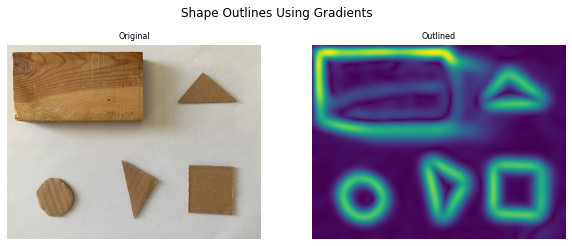

In [11]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import imtools
from lib.plot_gallery import *

from PIL import Image
import numpy as np
from scipy.ndimage import filters
from matplotlib import pyplot

def outline(im, sigma = 5):
    imx = np.zeros(im.shape)
    filters.gaussian_filter(
        input=im, sigma=(sigma,sigma), order=(0,1), output=imx
    )

    imy = np.zeros(im.shape)
    filters.gaussian_filter(
        input=im, sigma=(sigma,sigma), order=(1,0), output=imy
    )
    
    # magnitude
    return  np.sqrt(imx**2+imy**2)

SIGMA = 15
IMAGE_PATH = '../example-images/shapes/brown-on-white.jpeg'
orig_im = Image.open(IMAGE_PATH)
outlined_im = outline(np.array(orig_im.convert('L'), 'f'), SIGMA)

gallery = PlotGallery(title = 'Shape Outlines Using Gradients', figsize = (10,7))
gallery.add_exhibit(Exhibit(orig_im, title = 'Original'))
gallery.add_exhibit(Exhibit(outlined_im, title = 'Outlined'))
gallery.open()
